<a href="https://colab.research.google.com/github/vyragosa/Deep-Learning-with-Pytorch/blob/main/Lesson1/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

# Домашнее задание

## Задание 1
Реализуйте XOR с помощью 3 нейронов. Запишите ответ в виде выражения, состоящего из объектов neuron() – моделей нейрона с пороговой функцией активации, внутри скобок может быть что угодно. Входы верхнего уровня называются x1 и x2. Пример фрагмента записи: neuron(1x1 + 5x2 - 0.1) + neuron(x1)

Ответ: `neuron(neuron(-x1+x2)+neuron(x1+-x2))`

Проверим:

In [ ]:
import torch

In [ ]:
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = torch.nn.Linear(2, 1)

  def forward(self, x):
    return torch.heaviside(self.fc(x), torch.tensor([0.]))

In [ ]:
neuron1 = Neuron()
neuron1.fc.weight.data = torch.tensor([[1., -1.]])
neuron1.fc.bias.data = torch.tensor([0.])

In [ ]:
neuron2 = Neuron()
neuron2.fc.weight.data = torch.tensor([[-1., 1.]])
neuron2.fc.bias.data = torch.tensor([0.])

In [ ]:
neuron3 = Neuron()
neuron3.fc.weight.data = torch.tensor([[1., 1.]])
neuron3.fc.bias.data = torch.tensor([0.])

In [ ]:
x = torch.tensor([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.],])

neuron3(torch.cat((neuron1(x), neuron2(x)), 1))

tensor([[0.],
        [1.],
        [1.],
        [0.]], grad_fn=<NotImplemented>)

## Задание 2
Нарисуйте backward граф для выражения a*b+c*d. Сравните полученные теоретические значения с аттрибутами grad у исходных тензоров.

Зарисуем граф
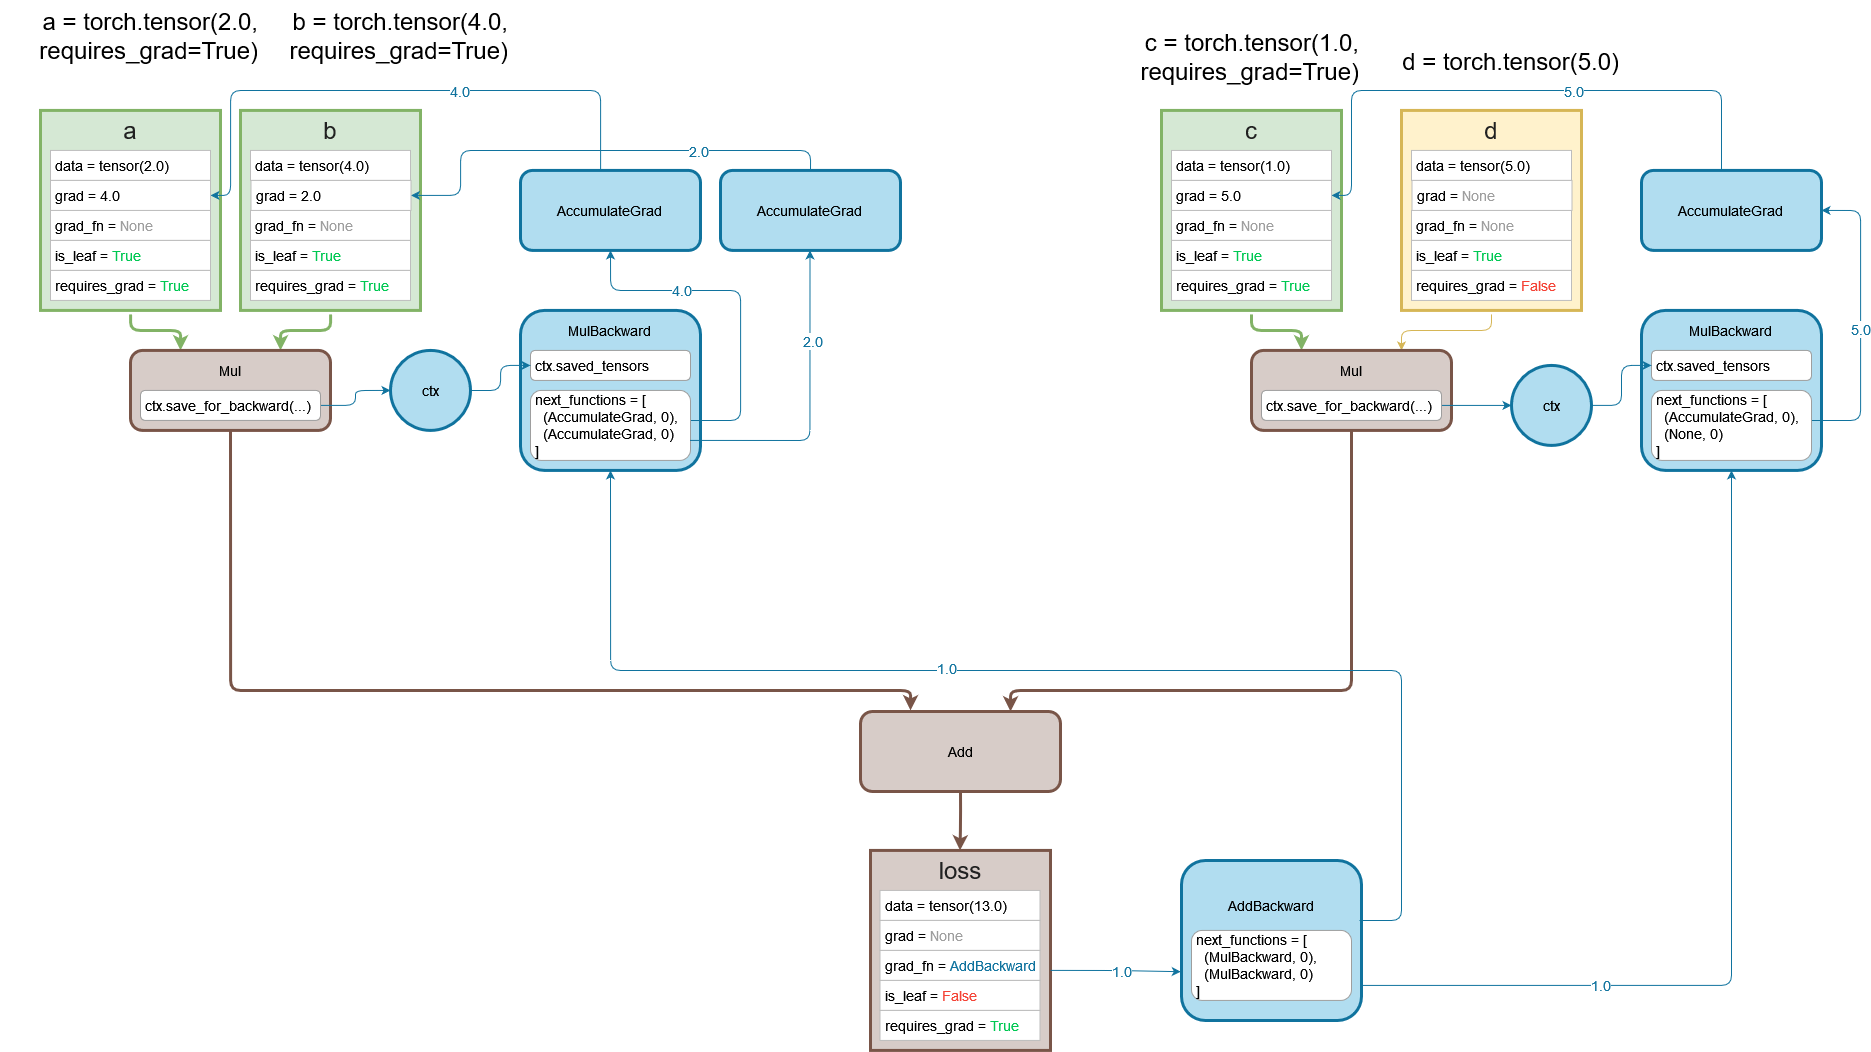

In [ ]:
a = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([4.0], requires_grad=True)
c = torch.tensor([1.0], requires_grad=True)
d = torch.tensor([5.0], requires_grad=False)

In [ ]:
print(a.grad)
print(b.grad)
print(c.grad)
print(d.grad)

None
None
None
None


In [ ]:
loss = a*b + c*d
loss.backward()

In [ ]:
print(a.grad)
print(b.grad)
print(c.grad)
print(d.grad)

tensor([4.])
tensor([2.])
tensor([5.])
None


## Задание 3
Поэксперементируйте с размером тензоров, которые влезут на видеоркарту в Colab. Найдите максимальный размер тензора для типа данных float32, float64, float16, int32, int64. На сколько они отличаются.

In [ ]:
import torch

In [ ]:
a=torch.zeros(4096,927872,dtype=torch.int32,device='cuda')

In [ ]:
torch.cuda.memory_reserved(), torch.cuda.memory_allocated()

(15202254848, 15202254848)

In [ ]:
!nvidia-smi

Sun Dec  4 15:25:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    29W /  70W |  15106MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Как мы видим, для int32 максимальное значение: (4096,927872)

Соответственно для:

int16 и float16: (4096, 1855744)

float32 и int32: (4096, 927872)

int64 и float64: (4096, 463936)

Размер тензора для 64-битного типа данных в два раза меньше 32-битного. Размер тензора для 32-битного типа данных в два раза меньше 16-битного.

## Задание 4

 Напишите хороший пример неэффективного кода для занятия памяти видеокарты, который вызовет ошибку out of memory

In [ ]:
import torch
def allocate_empty_tensor(dim_size):
  a=torch.zeros(4096,dim_size,dtype=torch.float32,device='cuda')

In [ ]:
allocate_empty_tensor(1000000000000)

RuntimeError: ignored

## Задание 5

Домашнее задание 5: Используя один линейный слой nn.Linear и один входной тензор x подберите подберите размерности так, чтобы занимать всю видеопамять. Попробуйте применить линейный слой к тензору x. Что произойдет? Кратко опишите ваши эксперименты. Что вы поняли?





In [ ]:
import torch
layer = torch.nn.Linear(4096 * 4096, 225, device='cuda')
x = torch.zeros(4096 * 4096, dtype=torch.float32, device='cuda')
layer(x)

RuntimeError: ignored

Память почти заполнена.Когда применяется линейный слой к тензору, код прерывается. Происходит это из-за того, что запрашивается память для инициализации, которой не хватает.